In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


###
import pandas as pd
df = pd.read_csv(r'C:\Users\talia\Downloads/b_depressed.csv')
df

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,926,91,1,28,1,4,10,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,747,57,1,23,1,3,8,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,1190,115,1,22,1,3,9,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,1065,97,1,27,1,2,10,4,52667108,19698904,...,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,806,42,0,59,0,4,10,6,82606287,17352654,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,255,22,1,25,1,1,7,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1425,547,69,1,28,1,4,10,6,15711078,24023054,...,0,1,0,0,23022095,1021536,0,1823477,47384361.0,0
1426,893,184,1,66,0,0,1,1,42440731,22861940,...,0,1,0,0,12545373,10454478,0,46444572,10454478.0,1
1427,363,75,1,51,1,1,12,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0


Survey id

Ville id

__sex__-  0 = female, 1= male

__Age__- in years

__Married__-  1 = Married, 0= Single

__Number children__- oun children

__education level__ - from 1 to 19

__total members__ - of people in family

__Columns related to assets, salaries and businesses, income and expenses__

gained asset

durable asset

save asset

living expenses

other expenses

incoming salary

incoming own farm

incoming business

incoming no business

incoming_agricultural

farm expenses

labor primary

lasting investment

no lasting investmen

__depressed - depressed=1__

cleaning data:

In [2]:
df.dropna(inplace=True)

df.gained_asset=df.gained_asset/10000
df.durable_asset=df.durable_asset/10000
df.save_asset=df.save_asset/10000
df.living_expenses=df.living_expenses/10000
df.other_expenses=df.other_expenses/10000
df.incoming_agricultural=df.incoming_agricultural/10000
df.farm_expenses=df.farm_expenses/10000
df.lasting_investment=df.lasting_investment/10000
df.no_lasting_investmen=df.no_lasting_investmen/10000

df.gained_asset=round(df.gained_asset)
df.durable_asset=round(df.durable_asset)
df.living_expenses=round(df.living_expenses)
df.other_expenses=round(df.other_expenses)
df.incoming_agricultural=round(df.incoming_agricultural)
df.farm_expenses=round(df.farm_expenses)
df.lasting_investment=round(df.lasting_investment)
df.no_lasting_investmen=round(df.no_lasting_investmen)

In [66]:
df.depressed.value_counts()

0    1174
1     235
Name: depressed, dtype: int64

In [25]:
df.shape

(1409, 23)

__Visualization:__

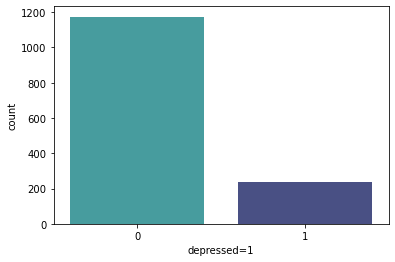

In [68]:
sns.countplot(x='depressed', data=df, palette="mako_r")
plt.xlabel("depressed=1")
plt.show()

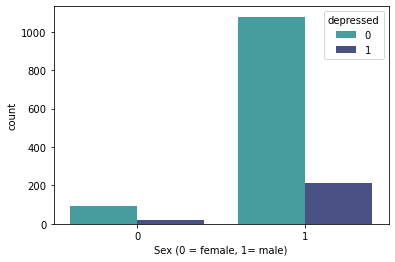

In [41]:
sns.countplot(x='sex',hue='depressed', data=df, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

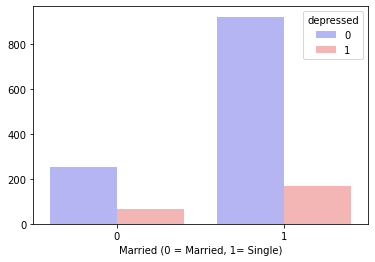

In [40]:

sns.countplot(x='Married',hue='depressed', data=df, palette="bwr")
plt.xlabel("Married (0 = Married, 1= Single)")
plt.ylabel("")
plt.show()

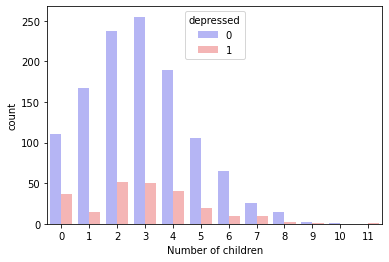

In [36]:
sns.countplot(x='Number_children',hue='depressed' , data=df, palette="bwr")
plt.xlabel("Number of children")
plt.show()

Text(0, 0.5, 'number')

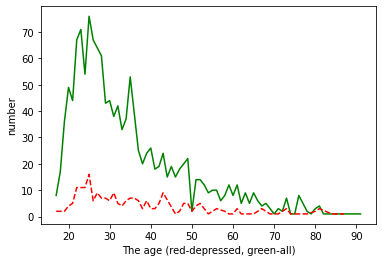

In [7]:
a= df.groupby (by=('Age'))["depressed"].count()
df2= df[df['depressed']==1]
b= df2.groupby (by=('Age'))["depressed"].count()
dfa= a.to_frame()
dfb= b.to_frame()
plt.plot(dfa,'g')
plt.plot(dfb,'r--')
plt.xlabel("The age (red-depressed, green-all)")
plt.ylabel("number")

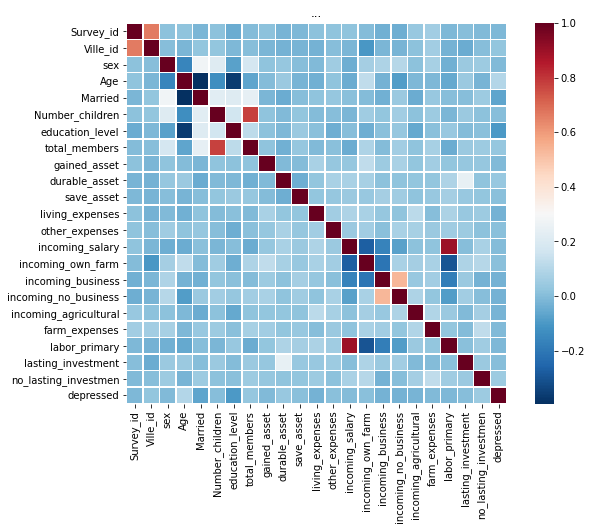

In [3]:
plt.subplots(figsize=(10, 7))
sns.heatmap(df.corr(), linewidths=0.4 , square=True, cmap = 'RdBu_r')
plt.title('...')
plt.show()

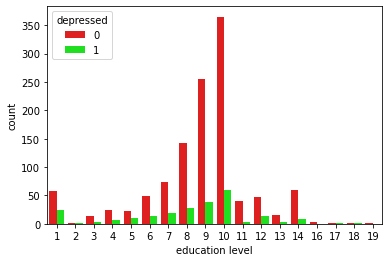

In [4]:
sns.countplot(x='education_level',hue='depressed' , data=df, palette= ['red', 'lime'])
plt.xlabel("education level")
plt.show()

__modeling__

division to train and test

In [67]:
from sklearn.model_selection import train_test_split
x = df.drop('depressed', axis=1)#, inplace= True)
y = df.depressed
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
print (x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape) 

(986, 22) (423, 22)
(986,) (423,)


showing the division in the data

In [68]:
df.depressed.value_counts()

g = df.depressed.value_counts()
from __future__ import division
pcts = g / g.sum()
pcts

0    0.833215
1    0.166785
Name: depressed, dtype: float64

dummy model

In [52]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(x,y)
dummy_clf.predict(x)
print("Dummy Classifier Score : ",dummy_clf.score(x, y))

Dummy Classifier Score :  0.8332150461320085


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 

knn model

In [69]:
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train, y_train)
prediction = (knn.predict_proba(x_test)[:,1]>0.40).astype(int) # chaing threshold
accuracy_score(y_test, prediction)

0.8226950354609929

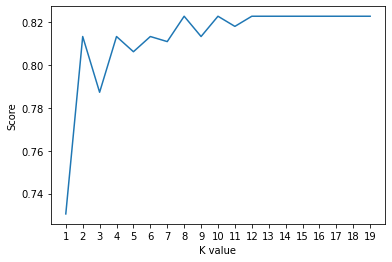

the maximum KNN score is: 82.26950354609929% while k=1


In [70]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
arr = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    knn_predict = knn.predict(x_test)
    arr.append(accuracy_score(y_test, knn_predict))
    
plt.plot(range(1,20), arr)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

maxS = max(arr)*100
print ("the maximum KNN score is: " + str(maxS) + "% while k=1")

We can see he isnt good enough, did not bypass the dummy

Random Forest

In [71]:
from sklearn.metrics import accuracy_score
RForest = RandomForestClassifier()
RForest.fit(x_train, y_train)
prediction = RForest.predict(x_test)
accuracy_score(y_test, prediction)

0.817966903073286

he is olso didnt go very well, so I tride enathe one

LogisticRegression

In [72]:
from sklearn.metrics import accuracy_score #?
LRegression = LogisticRegression()
LRegression.fit(x_train, y_train)
prediction = LRegression.predict(x_test)
accuracy_score(y_test, prediction)

C:\Users\talia\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8226950354609929

The three models failed to overtake the Dummy

__improve the models__

first, lets remov the columns whose data are irrelevant

In [3]:
df_improve= df.drop(['Survey_id','Ville_id'],axis=1)


change some of the columns (as needed) to dummies

nan

Removing hanging columns acording to the heat table

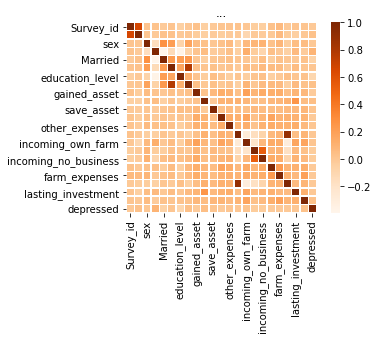

In [74]:
plt.subplots(figsize=(5, 3.5))
sns.heatmap(df.corr(), linewidths=0.4 , square=True, cmap = 'Oranges')
plt.title('...')
plt.show()

In [4]:
df_improve= df_improve.drop(['incoming_salary','total_members','incoming_no_business'],axis=1)

Normalization of values

In [5]:
from sklearn.preprocessing import StandardScaler

not_scaled = df[['sex', 'Married','incoming_own_farm','incoming_business','labor_primary', 'depressed']]
df_improve.drop(['sex', 'Married','incoming_own_farm','incoming_business','labor_primary', 'depressed'], axis=1, inplace=True)

scaler = StandardScaler()
new_df = scaler.fit_transform(df_improve)
df_improve = pd.DataFrame(new_df, columns=df_improve.columns)

a=[]
for i in range (1409):
    b= [i]
    a=a+b
not_scaled['i']= a
df_improve['i']=a

df_improve= pd.merge(df_improve,not_scaled, how="outer", on="i")

df_improve.drop(['i'], axis=1, inplace=True)

<ipython-input-5-5235c32040f1>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_scaled['i']= a


check the models again

In [142]:
x = df_improve.drop('depressed', axis=1)
y = df_improve.depressed
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
print (x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(986, 17) (423, 17)
(986,) (423,)


knn

In [79]:
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(x_train, y_train)
prediction = (knn.predict_proba(x_test)[:,1]>1).astype(int) # chaing threshold
accuracy_score(y_test, prediction)

0.8274231678486997

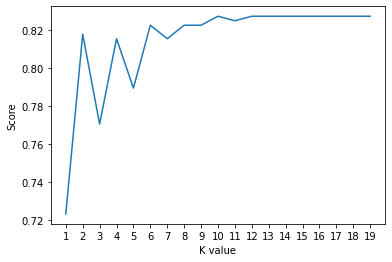

the maximum KNN score is: 82.74231678486997% while k=1


In [80]:
arr = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    knn_predict = knn.predict(x_test)
    arr.append(accuracy_score(y_test, knn_predict))
    
plt.plot(range(1,20), arr)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

maxS = max(arr)*100
print ("the maximum KNN score is: " + str(maxS) + "% while k=1")

Random Forest

In [81]:
from sklearn.metrics import accuracy_score
RForest = RandomForestClassifier()
RForest.fit(x_train, y_train)
prediction = RForest.predict(x_test)
accuracy_score(y_test, prediction)

0.817966903073286

LogisticRegression

In [82]:
from sklearn.metrics import accuracy_score #?
LRegression = LogisticRegression()
LRegression.fit(x_train, y_train)
prediction = LRegression.predict(x_test)
accuracy_score(y_test, prediction)

0.8274231678486997

__conclution__

knn:

Training Accuracy : 0.8356997971602435
Testing Accuracy : 0.8132387706855791

              precision    recall  f1-score   support

           0       0.83      0.97      0.90       352
           1       0.10      0.01      0.02        71

    accuracy                           0.81       423
   macro avg       0.47      0.49      0.46       423
weighted avg       0.71      0.81      0.75       423



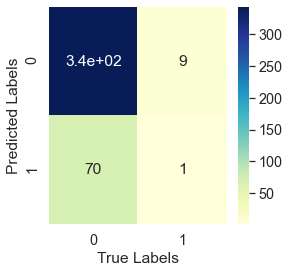

In [71]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report


results={}
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(x_train, y_train)
    #model prediction
y_pred = knn.predict(x_test)
sns.set(font_scale=1.3)
fig, ax = plt.subplots(figsize=(4, 4))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cbar=True , cmap="YlGnBu")
plt.xlabel("True Labels")
plt.ylabel("Predicted Labels")
    # add accuracy score to 'results'
results[knn]=metrics.accuracy_score(y_test, y_pred)
    # evaluating the model
print("Training Accuracy :", knn.score(x_train, y_train))
print("Testing Accuracy :" , metrics.accuracy_score(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))

ROC Score : 53.800000000000004 %


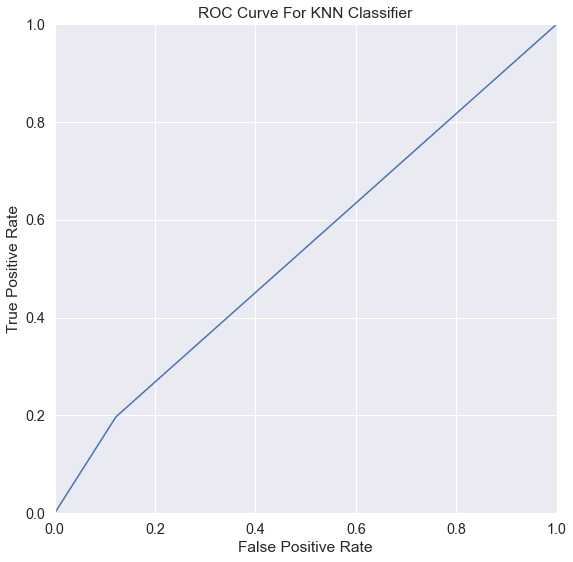

In [72]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
y_pred_prob = knn.predict_proba(x_test)[:, 1]
print('ROC Score :' , round(metrics.roc_auc_score(y_test, y_pred_prob),3)*100 , '%')
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.subplots(figsize=(9, 9))
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve For KNN Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

Random Forest

Training Accuracy : 0.9929006085192698
Testing Accuracy : 0.8108747044917257

              precision    recall  f1-score   support

           0       0.83      0.97      0.90       352
           1       0.09      0.01      0.02        71

    accuracy                           0.81       423
   macro avg       0.46      0.49      0.46       423
weighted avg       0.71      0.81      0.75       423



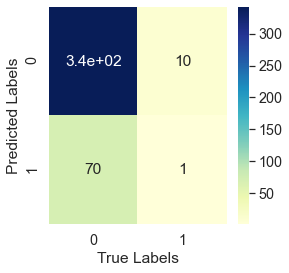

In [73]:
results={}
RForest = RandomForestClassifier()
RForest.fit(x_train, y_train)
    #model prediction
y_pred = RForest.predict(x_test)
sns.set(font_scale=1.3)
fig, ax = plt.subplots(figsize=(4, 4))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cbar=True , cmap="YlGnBu")
plt.xlabel("True Labels")
plt.ylabel("Predicted Labels")
    # add accuracy score to 'results'
results[RForest]=metrics.accuracy_score(y_test, y_pred)
    # evaluating the model
print("Training Accuracy :", RForest.score(x_train, y_train))
print("Testing Accuracy :" , metrics.accuracy_score(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))

ROC Score : 52.800000000000004 %


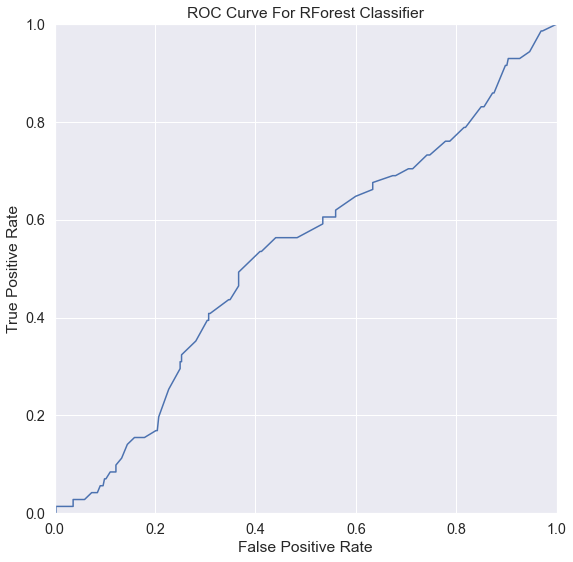

In [79]:
RForest = RandomForestClassifier()
RForest.fit(x_train,y_train)
y_pred = RForest.predict(x_test)
y_pred_prob = RForest.predict_proba(x_test)[:, 1]
print('ROC Score :' , round(metrics.roc_auc_score(y_test, y_pred_prob),3)*100 , '%')
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.subplots(figsize=(9, 9))
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve For RForest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

LogisticRegression:

Training Accuracy : 0.834685598377282
Testing Accuracy : 0.8321513002364066

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       352
           1       0.00      0.00      0.00        71

    accuracy                           0.83       423
   macro avg       0.42      0.50      0.45       423
weighted avg       0.69      0.83      0.76       423



C:\Users\talia\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


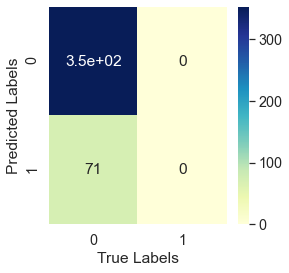

In [80]:
results={}
LRegression = LogisticRegression()
LRegression.fit(x_train, y_train)
    #model prediction
y_pred = LRegression.predict(x_test)
sns.set(font_scale=1.3)
fig, ax = plt.subplots(figsize=(4, 4))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cbar=True , cmap="YlGnBu")
plt.xlabel("True Labels")
plt.ylabel("Predicted Labels")
    # add accuracy score to 'results'
results[LRegression]=metrics.accuracy_score(y_test, y_pred)
    # evaluating the model
print("Training Accuracy :", LRegression.score(x_train, y_train))
print("Testing Accuracy :" , metrics.accuracy_score(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))

ROC Score : 54.400000000000006 %


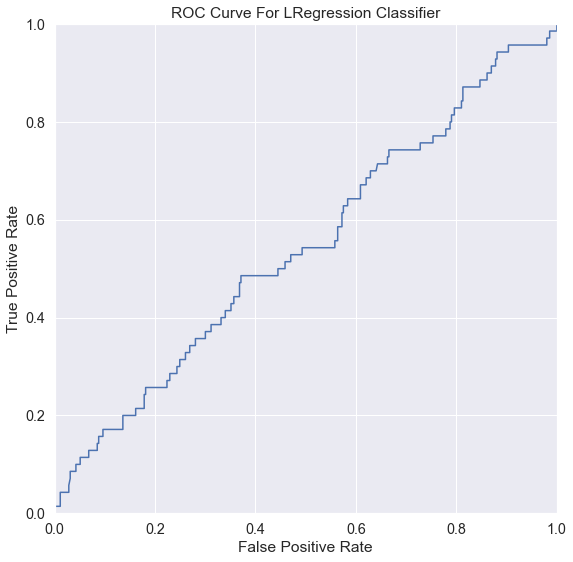

In [41]:
LRegression = LogisticRegression()
LRegression.fit(x_train,y_train)
y_pred = LRegression.predict(x_test)
y_pred_prob = LRegression.predict_proba(x_test)[:, 1]
print('ROC Score :' , round(metrics.roc_auc_score(y_test, y_pred_prob),3)*100 , '%')
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.subplots(figsize=(9, 9))
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve For LRegression Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

*semester 2:*

In [148]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(x_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.9) + 1
d

11

In [142]:
x = df_improve.drop('depressed', axis=1)
y = df_improve.depressed
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
print (x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(986, 17) (423, 17)
(986,) (423,)


In [151]:
pca = PCA(n_components = 11)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
explained_variance = pca.explained_variance_ratio_


try models of ensemble learning:

In [143]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
#from sklearn.metrics import r2_score
#from sklearn.metrics import mean_absolute_error
#from sklearn.metrics import mean_squared_error

from sklearn.metrics import accuracy_score

In [144]:
def pred(model):
    model.fit(x_train,y_train)
    prediction = model.predict(x_test)
    accuracy_score(y_test, prediction)
    print("model: ", model)
    print("Accuracy: ", round(accuracy_score(y_test, prediction)*100,2))


the modals from last semester:

In [85]:
pred(KNeighborsClassifier())


model:  KNeighborsClassifier()
Accuracy:  78.96


In [86]:
pred(LogisticRegression())

model:  LogisticRegression()
Accuracy:  82.74


In [87]:
pred(RandomForestClassifier())

model:  RandomForestClassifier()
Accuracy:  81.56


using PCA:

In [148]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(x_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.9) + 1
d

11

In [151]:
pca = PCA(n_components = 11)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
explained_variance = pca.explained_variance_ratio_




__the ensemble learning models:__

In [153]:
pred(AdaBoostClassifier())

model:  AdaBoostClassifier()
Accuracy:  80.85


In [154]:
pred(GradientBoostingClassifier())

model:  GradientBoostingClassifier()
Accuracy:  82.03


In [155]:
r1 = LogisticRegression()
r2 = RandomForestClassifier()
r3 = KNeighborsClassifier()
r4 = AdaBoostClassifier()
r5 = GradientBoostingClassifier()
vr = VotingClassifier([('lr', r1), ('rf', r2),('knn', r3),('ab', r4) , ('xgb', r5) ])
pred(vr)

model:  VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('knn', KNeighborsClassifier()),
                             ('ab', AdaBoostClassifier()),
                             ('xgb', GradientBoostingClassifier())])
Accuracy:  82.03


In [156]:
def predPCA(model):
    model.fit(x_train,y_train)
    prediction = model.predict(x_test)
    accuracy_score(y_test, prediction)
    print("model: ", model)
    print("Accuracy: ", round(accuracy_score(y_test, prediction)*100,2))

In [157]:
predPCA(AdaBoostClassifier())

model:  AdaBoostClassifier()
Accuracy:  80.85


In [158]:
predPCA(GradientBoostingClassifier())

model:  GradientBoostingClassifier()
Accuracy:  82.03


In [159]:
r1 = LogisticRegression()
r2 = RandomForestClassifier()
r3 = KNeighborsClassifier()
r4 = AdaBoostClassifier()
r5 = GradientBoostingClassifier()
vr = VotingClassifier([('lr', r1), ('rf', r2),('knn', r3),('ab', r4) , ('xgb', r5) ])
predPCA(vr)

model:  VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('knn', KNeighborsClassifier()),
                             ('ab', AdaBoostClassifier()),
                             ('xgb', GradientBoostingClassifier())])
Accuracy:  81.8


In [127]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
rf=RandomForestClassifier(n_estimators=10, random_state=42)
mpp=make_pipeline(StandardScaler(),LinearSVC(random_state=1, tol=1e-5))

rf=RandomForestClassifier(n_estimators=10, random_state=42)
mpp=make_pipeline(StandardScaler(),LinearSVC(random_state=1, tol=1e-5))

r1 = LogisticRegression()
r2 = DecisionTreeClassifier()
r3 = KNeighborsClassifier()
r4 = AdaBoostClassifier()
r5 = GradientBoostingClassifier()
r6 = RandomForestClassifier(n_estimators=10, random_state=42)
r7 = make_pipeline(StandardScaler(),LinearSVC(random_state=1, tol=1e-5))
vr = VotingClassifier([('lr', r1), ('dt', r2),('knn', r3),('ab', r4) , ('xgb', r5), ('rfc',r6),('mpp', r7)])
pred(vr)

model:  VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()),
                             ('knn', KNeighborsClassifier()),
                             ('ab', AdaBoostClassifier()),
                             ('xgb', GradientBoostingClassifier()),
                             ('rfc',
                              RandomForestClassifier(n_estimators=10,
                                                     random_state=42)),
                             ('mpp',
                              Pipeline(steps=[('standardscaler',
                                               StandardScaler()),
                                              ('linearsvc',
                                               LinearSVC(random_state=1,
                                                         tol=1e-05))]))])
Accuracy:  82.74


C:\Users\talia\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [160]:
from sklearn.ensemble import StackingClassifier

estimators = [('rf',r6 ),('mpp',r7),('lr', r1),('knn',r3)]
sc=StackingClassifier(estimators)
pred(sc)

C:\Users\talia\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\talia\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\talia\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\talia\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\talia\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

model:  StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42)),
                               ('mpp',
                                Pipeline(steps=[('standardscaler',
                                                 StandardScaler()),
                                                ('linearsvc',
                                                 LinearSVC(random_state=1,
                                                           tol=1e-05))])),
                               ('lr', LogisticRegression()),
                               ('knn', KNeighborsClassifier())])
Accuracy:  82.27


Using everything we learned throughout the last semester , 82.74 is the best Accuracy we can achieve